# RFM ANALYSIS FOR ONLİNE RETAIL DATA SET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns",None);
pd.set_option("display.max_rows",None);
retail=pd.read_excel("../input/online-retail-ii-dataset/online_retail_II.xlsx", sheet_name="Year 2010-2011")


In [2]:
df=retail.copy()

In [3]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### This dataset has 8 columns and 541.910 observations.

# NA VALUES

### There are 135.080 NA values in Customer ID column and 1.454 NA values in Description column.

In [5]:
df.isna().sum()  

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

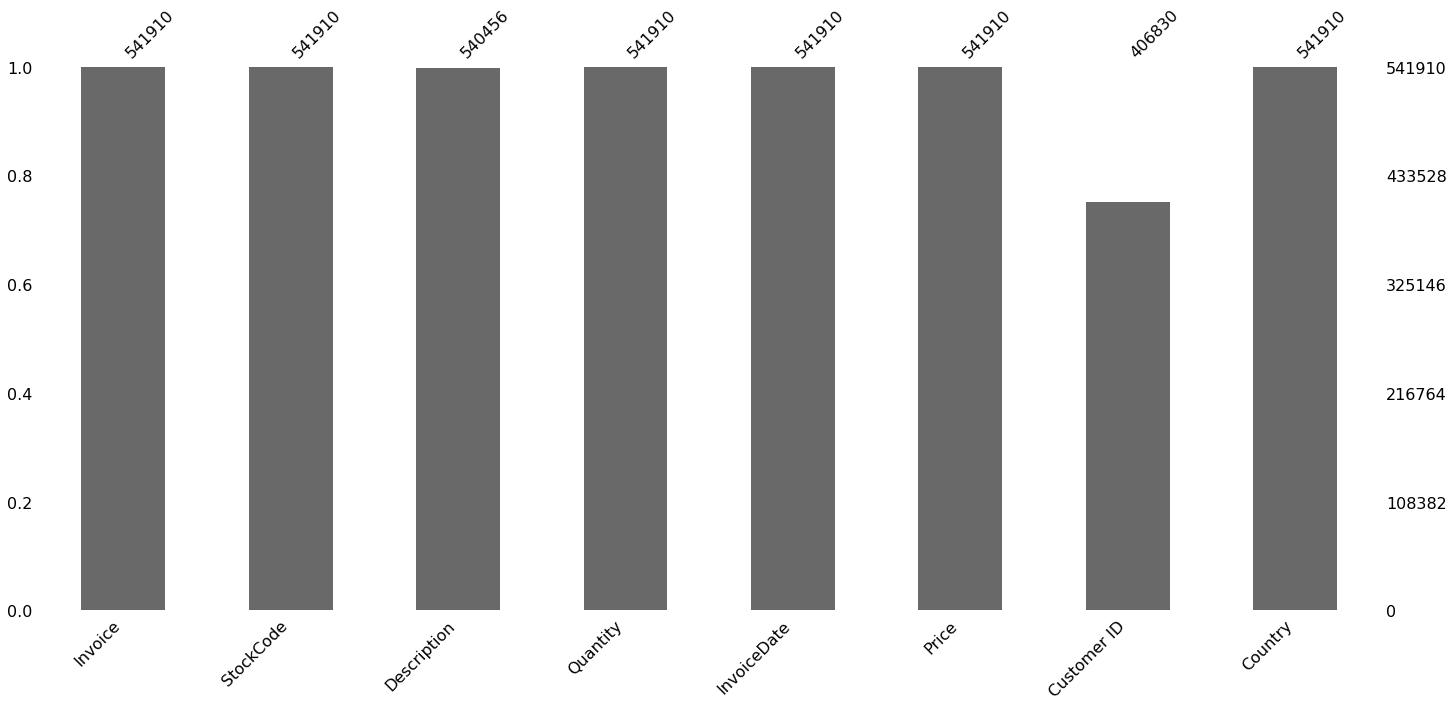

In [6]:
import missingno as msno
msno.bar(df);

In [7]:
df[df.isnull().any(axis=1)].shape

(135080, 8)

# Are these NA Values are formed RANDOMLY?

### I used heatmap method.
### I concluded that %10 of the observations which have NA for ID also have NA for Description.

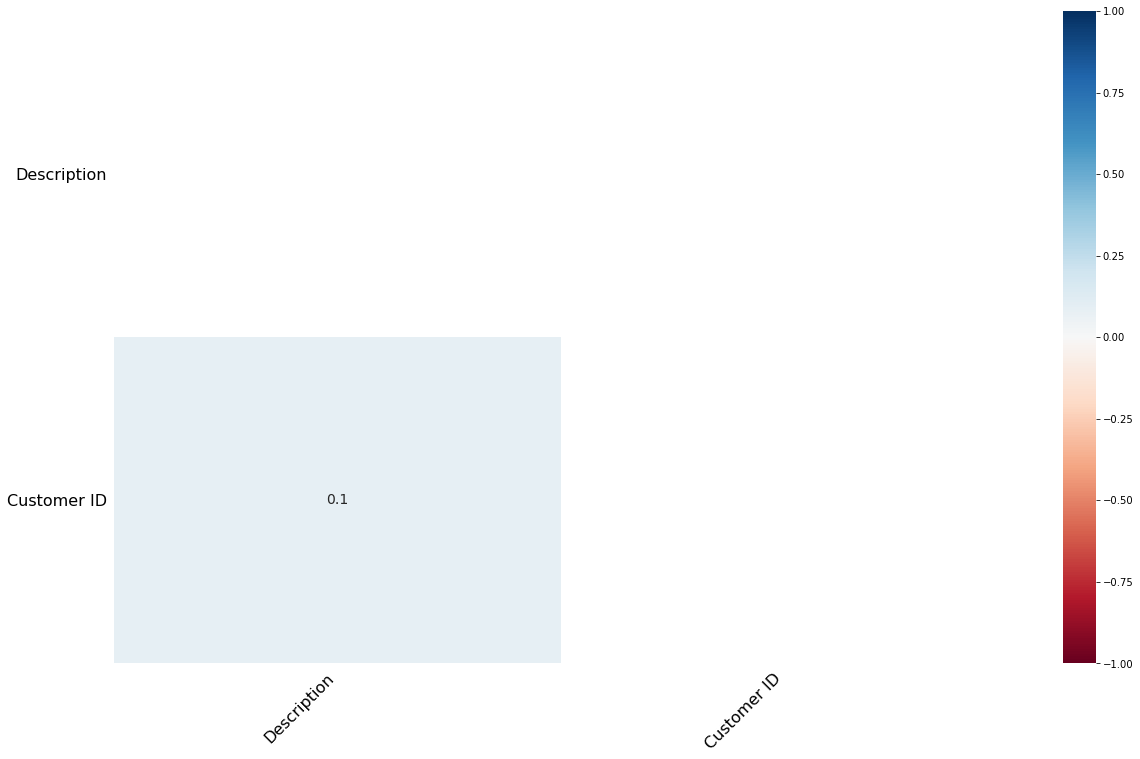

In [8]:
import missingno as msno
msno.heatmap(df);

In [9]:
df[df.isnull().any(axis=1)].shape

(135080, 8)

# %24 of the dataset is missing. It so much.

In [10]:
135080/541910

0.2492664833643963

### How about the Price?

In [11]:
missingdf=df[(df["Description"].isnull()==True)  & (df["Customer ID"].isnull()==True)].head()
missingdf.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


### I grouped this data set by country. 
### Price mean is 0 and there is only one country. Therefore, trying to fill these observations will be meaningless.

In [12]:
missingdf.groupby("Country").agg({"Price":np.mean})

,Price
Country,
United Kingdom,0.0


# New df without NA

In [13]:
df=df[df.notnull().all(axis=1)]
print(df.shape)

(406830, 8)


In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Description of data set
* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. **If this code starts with the letter 'c', it indicates a cancellation.**
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

### I focused Customer ID and Invoice No then checked the price values.

In [15]:
df["Customer ID"]=df["Customer ID"].astype("int64")

In [16]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom


## I checked Invoice values if it starts with "c" letter or not

In [17]:
df[df["Invoice"].astype("str").str.get(0)=="C"].shape

(8905, 8)

In [18]:
df[df["Invoice"].astype("str").str.get(0)=="C"].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [19]:
df=df[df["Invoice"].astype("str").str.get(0)!="C"]

In [20]:
df[df["Invoice"].astype(str).str.get(0)!="5"].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [21]:
df[df["Quantity"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


## Identify the data

### Whole data value count is 397.925 and 354.345 of these data from UK. Nearly 90% of the data observations are from United Kingdom. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  int64         
 7   Country      397925 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [23]:
df.Country.value_counts().head()

United Kingdom    354345
Germany             9042
France              8343
EIRE                7238
Spain               2485
Name: Country, dtype: int64

In [24]:
df[df.duplicated(["Description","Invoice"],keep=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311,United Kingdom
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom


In [25]:
df=df.drop([125])
df[df.duplicated(["Description","Invoice"],keep=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom


In [26]:
df.groupby("Country").agg({"Price":"sum"}).applymap('{:,.2f}'.format).sort_values(by="Price", ascending=True).head(10)

,Price
Country,
United Kingdom,"1,050,203.91"
Denmark,"1,195.55"
Poland,"1,377.21"
Austria,"1,693.90"
Sweden,"1,695.79"
Singapore,"12,949.99"
Brazil,142.60
Saudi Arabia,21.16
United Arab Emirates,229.89


In [27]:
# Unique products

In [28]:
df["Description"].nunique()

3877

In [29]:
# Each products counts are..

In [30]:
df.Description.value_counts().head() # counts of categorical values

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: Description, dtype: int64

In [31]:
# Best-seller

In [32]:
df.groupby("Description").agg({"Quantity":sum}).sort_values(by="Quantity", ascending=False).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


In [33]:
# Unique invoice

In [34]:
df["Invoice"].nunique()

18536

In [35]:
df["Total_price"]=df["Quantity"]*df["Price"]

In [36]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [37]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [38]:
# The top invoices for price

In [39]:
df.groupby("Invoice").agg({"Total_price":sum}).head()

,Total_price
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [40]:
df.groupby("Invoice").agg({"Total_price":"sum"}).sort_values("Total_price", ascending=False).head(11)

,Total_price
Invoice,
581483,168469.60
541431,77183.60
556444,38970.00
567423,31698.16
556917,22775.93
572209,22206.00
567381,22104.80
563614,21880.44
550461,21535.90


In [41]:
# The highest invoice

In [42]:
df[df["Invoice"]==581483]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60


In [43]:
# The most expensive product is "POSTAGE"

In [44]:
df.sort_values("Price",ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
422377,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06
422374,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32
374541,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502,United Kingdom,3155.95


In [45]:
# Countries total prices

In [46]:
df.groupby("Country").agg({"Total_price":"sum"}).sort_values("Total_price",ascending=False).head()

,Total_price
Country,
United Kingdom,7308387.80
Netherlands,285446.34
EIRE,265545.90
Germany,228867.14
France,209042.05


# RFM SCORES

## RECENCY

In [47]:
print(df["InvoiceDate"].max())
print(df["InvoiceDate"].min())

2011-12-09 12:50:00
2010-12-01 08:26:00


In [48]:
import datetime as dt
today_date=dt.datetime(2011,12,10)
print(today_date)
df.groupby("Customer ID").agg({"InvoiceDate":max}).sort_values("InvoiceDate", ascending=False).head(3)

2011-12-10 00:00:00


,InvoiceDate
Customer ID,
12680,2011-12-09 12:50:00
13113,2011-12-09 12:49:00
15804,2011-12-09 12:31:00


In [49]:
rec_df=today_date-df.groupby("Customer ID").agg({"InvoiceDate":max})
rec_df.head(3)

,InvoiceDate
Customer ID,
12346,325 days 13:59:00
12347,2 days 08:08:00
12348,75 days 10:47:00


In [50]:
rec_df.rename(columns={"InvoiceDate": "Recency"}, inplace=True)
rec_df.head(3)

,Recency
Customer ID,
12346,325 days 13:59:00
12347,2 days 08:08:00
12348,75 days 10:47:00


In [51]:
rec_df=rec_df["Recency"].apply(lambda x: x.days)
rec_df.head()

Customer ID
12346    325
12347      2
12348     75
12349     18
12350    310
Name: Recency, dtype: int64

## FREQUENCY

In [52]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [53]:
df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"}).head(5)

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18

In [54]:
df[df["Customer ID"]==17841].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841,United Kingdom,10.50
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841,United Kingdom,2.90
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841,United Kingdom,1.45
2040,536557,22731,3D CHRISTMAS STAMPS STICKERS,1,2010-12-01 14:41:00,1.25,17841,United Kingdom,1.25
2041,536557,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-01 14:41:00,12.75,17841,United Kingdom,12.75
2042,536557,21041,RED RETROSPOT OVEN GLOVE DOUBLE,1,2010-12-01 14:41:00,2.95,17841,United Kingdom,2.95
2043,536557,84920,PINK FLOWER FABRIC PONY,1,2010-12-01 14:41:00,3.75,17841,United Kingdom,3.75
2044,536557,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,1,2010-12-01 14:41:00,2.95,17841,United Kingdom,2.95
2045,536557,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,1,2010-12-01 14:41:00,1.25,17841,United Kingdom,1.25
2046,536557,84508A,CAMOUFLAGE DESIGN TEDDY,1,2010-12-01 14:41:00,2.55,17841,United Kingdom,2.55


In [55]:
df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).head(10)

,InvoiceDate
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1


In [56]:
freq_df=df.groupby("Customer ID").agg({"InvoiceDate":"nunique"})
freq_df.head(10)


,InvoiceDate
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1


In [57]:
freq_df.rename(columns={"InvoiceDate": "Frequency"}, inplace=True)
freq_df.head(3)

,Frequency
Customer ID,
12346,1
12347,7
12348,4


# MONETARY

In [58]:
monetary_df=df.groupby("Customer ID").agg({"Total_price":"sum"})
monetary_df.head(7)

,Total_price
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
12352,2506.04
12353,89.00


In [59]:
monetary_df.rename(columns={"Total_price":"Monetary"}, inplace=True)
monetary_df.head()

,Monetary
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [60]:
rfm=pd.concat([rec_df,freq_df, monetary_df], axis=1)
rfm.head(7)

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40
12352,36,8,2506.04
12353,204,1,89.00


In [61]:
rfm["Recency_Score"]= pd.qcut(rfm["Recency"],5, labels=[5,4,3,2,1])

In [62]:
rfm["Frequency_Score"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])


In [63]:
rfm["Monetary_Score"]=pd.qcut(rfm["Monetary"],5, labels=[1,2,3,4,5])

In [64]:
rfm.head(7)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
Customer ID,,,,,,
12346,325,1,77183.60,1,1,5
12347,2,7,4310.00,5,5,5
12348,75,4,1797.24,2,4,4
12349,18,1,1757.55,4,1,4
12350,310,1,334.40,1,1,2
12352,36,8,2506.04,3,5,5
12353,204,1,89.00,1,1,1


In [65]:
rfm["RFM"]=rfm["Recency_Score"].astype(str)+rfm["Frequency_Score"].astype(str)+rfm["Monetary_Score"].astype(str)
rfm.head(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM
Customer ID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12347,2,7,4310.00,5,5,5,555
12348,75,4,1797.24,2,4,4,244
12349,18,1,1757.55,4,1,4,414
12350,310,1,334.40,1,1,2,112
12352,36,8,2506.04,3,5,5,355
12353,204,1,89.00,1,1,1,111
12354,232,1,1079.40,1,1,4,114
12355,214,1,459.40,1,1,2,112


In [66]:
rfm.head(6)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM
Customer ID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12347,2,7,4310.00,5,5,5,555
12348,75,4,1797.24,2,4,4,244
12349,18,1,1757.55,4,1,4,414
12350,310,1,334.40,1,1,2,112
12352,36,8,2506.04,3,5,5,355


In [67]:
seg_map={r'[1-2][1-2]': "Hibernating", r'[1-2][3-4]': "At Risk", r'[1-2]5': "Can't Lose", r'3[1-2]': "About to Sleep",
        r'33': "Need Attention", r'[3-4][4-5]': "Loyal Customers", r'41': "Promising", r'51': "New Customers",
        r'[4-5][2-3]': "Potential Loyalist", r'5[4-5]': "Champions"}

In [68]:
rfm["Segment"]=rfm["Recency_Score"].astype(str)+ rfm["Frequency_Score"].astype(str)
rfm["Segment"]=rfm["Segment"].replace(seg_map,regex=True)

In [69]:
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM,Segment
Customer ID,,,,,,,,
12346,325,1,77183.60,1,1,5,115,Hibernating
12347,2,7,4310.00,5,5,5,555,Champions
12348,75,4,1797.24,2,4,4,244,At Risk
12349,18,1,1757.55,4,1,4,414,Promising
12350,310,1,334.40,1,1,2,112,Hibernating


In [70]:
rfm[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["min","max","mean","count"])

Recency                   Frequency                   \
                       min  max   mean count       min  max  mean count   
Segment                                                                   
About to Sleep          33   71  52.37   353         1    2  1.16   353   
At Risk                 72  373 153.04   594         2    5  2.87   594   
Can't Lose              72  372 131.05    64         6   33  8.31    64   
Champions                0   12   5.37   632         3  211 12.34   632   
Hibernating             72  373 216.66  1069         1    2  1.10  1069   
Loyal Customers         14   71  32.69   820         3   61  6.44   820   
Need Attention          33   71  51.27   184         2    3  2.32   184   
New Customers            0   12   6.43    42         1    1  1.00    42   
Potential Loyalist       0   32  16.37   486         1    3  2.01   486   
Promising               14   32  22.42    95         1    1  1.00    95   

                   Monetary                          
                        min       max    mean count  
Segment                                              
About to Sleep         6.20   6207.67  472.55   353  
At Risk               52.00  44534.30 1079.81   594  
Can't Lose            70.02  10254.18 2791.01    64  
Champions            201.12 280206.02 6866.77   632  
Hibernating            3.75  77183.60  488.86  1069  
Loyal Customers       36.56 124914.53 2862.89   820  
Need Attention         6.90  12601.83  894.49   184  
New Customers         89.94   3861.00  388.21    42  
Potential Loyalist    20.80 168472.50 1041.34   486  
Promising              0.00   1757.55  290.91    95

# "At Risk"

At Risk Customers are customers who purchased often and spent big amounts, but haven’t purchased recently.
* We can send them personalized reactivation campaigns to reconnect,
* We can offer renewals and helpful products to encourage another purchase.




* There are 594 customers in this group.
* Their last purchases was 153 days ago, meanly. 
* The frequency of the group's purchase mean is 2.8.
* The mean of the total purchase for one person who is in this group is 1079 sterlin.

# Can't Lose

They are customers who used to visit and purchase quite often, but haven’t been visiting recently. If we don't take any actions immediately, we will lose them.
* We can bring them back with relevant promotions, 
* We can run surveys to find out what went wrong and avoid losing them to a competitor.


* There are 64 customers in this group.
* Their last purchases was 131 days ago, meanly.
* The frequency of the group's purchase mean is 8.3.
* The mean of the total purchase for one person who is in this group is 2791 sterlin.

# New Customers

They are customers who have a high overall RFM score but are not frequent shoppers. 
* We can start building relationships with these customers by providing onboarding support and special offers to increase their visits.

* There are 42 customers in this group.
* Their last purchases was 6.4 days ago, meanly.
* The frequency of the group's purchase mean is 1.
* The mean of the total purchase for one person who is in this group is 388 sterlin.

# ID Excel File for Need Attention Segmentation 

In [71]:
rfm[rfm["Segment"]=="Need Attention"].index

Int64Index([12360, 12372, 12413, 12456, 12536, 12577, 12759, 12808, 12879,
            12885,
            ...
            17928, 17934, 17999, 18147, 18160, 18205, 18228, 18252, 18261,
            18270],
           dtype='int64', name='Customer ID', length=184)

In [72]:
dff=pd.DataFrame()
dff["Need_Attention_ID"]=rfm[rfm["Segment"]=="Need Attention"].index
dff.head()

,Need_Attention_ID
0,12360
1,12372
2,12413
3,12456
4,12536


In [73]:
dff.to_csv("Need_Attention.csv")